<a href="https://colab.research.google.com/github/adimyth/interesting_stuff/blob/master/object_detection/Localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from bs4 import BeautifulSoup
import csv
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import xml.etree.ElementTree as ET

## Downloading Dataset

In [2]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz

--2019-12-27 16:43:40--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/x-gzip]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  21.9MB/s    in 35s     

2019-12-27 16:44:16 (21.3 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]



In [3]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

--2019-12-27 16:44:18--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/x-gzip]
Saving to: ‘annotations.tar.gz’

annotations.tar.gz  100%[===================>]  18.28M  10.1MB/s    in 1.8s    

2019-12-27 16:44:20 (10.1 MB/s) - ‘annotations.tar.gz’ saved [19173078/19173078]



In [0]:
!tar xf images.tar.gz

In [0]:
!tar xf annotations.tar.gz

## Creating Dataset

In [0]:
!mv annotations/xmls/* images/

In [7]:
DATASET_FOLDER = "images/"
TRAIN_OUTPUT_FILE = "train.csv"
VALIDATION_OUTPUT_FILE = "validation.csv"

SPLIT_RATIO = 0.8

def main():
    if not os.path.exists(DATASET_FOLDER):
        print("Dataset not found")
        return

    class_names = {}
    k = 0
    output = []
    xml_files = glob.glob("{}/*xml".format(DATASET_FOLDER))
    for i, xml_file in enumerate(xml_files):
        tree = ET.parse(xml_file)

        path = os.path.join(DATASET_FOLDER, tree.findtext("./filename"))

        height = int(tree.findtext("./size/height"))
        width = int(tree.findtext("./size/width"))
        xmin = int(tree.findtext("./object/bndbox/xmin"))
        ymin = int(tree.findtext("./object/bndbox/ymin"))
        xmax = int(tree.findtext("./object/bndbox/xmax"))
        ymax = int(tree.findtext("./object/bndbox/ymax"))

        basename = os.path.basename(path)
        basename = os.path.splitext(basename)[0]
        class_name = basename[:basename.rfind("_")].lower()
        if class_name not in class_names:
            class_names[class_name] = k
            k += 1

        output.append((path, height, width, xmin, ymin, xmax, ymax, class_name, class_names[class_name]))

    # preserve percentage of samples for each class ("stratified")
    output.sort(key=lambda tup : tup[-1])

    lengths = []
    i = 0
    last = 0
    for j, row in enumerate(output):
        if last == row[-1]:
            i += 1
        else:
            print("class {}: {} images".format(output[j-1][-2], i))
            lengths.append(i)
            i = 1
            last += 1

    lengths.append(i)

    with open(TRAIN_OUTPUT_FILE, "w") as train, open(VALIDATION_OUTPUT_FILE, "w") as validate:
        writer = csv.writer(train, delimiter=",")
        writer2 = csv.writer(validate, delimiter=",")

        s = 0
        for c in lengths:
            for i in range(c):
                print("{}/{}".format(s + 1, sum(lengths)), end="\r")

                path, height, width, xmin, ymin, xmax, ymax, class_name, class_id = output[s]

                if xmin >= xmax or ymin >= ymax or xmax > width or ymax > height or xmin < 0 or ymin < 0:
                    print("Warning: {} contains invalid box. Skipped...".format(path))
                    continue

                row = [path, height, width, xmin, ymin, xmax, ymax, class_name, class_names[class_name]]
                if i <= c * SPLIT_RATIO:
                    writer.writerow(row)
                else:
                    writer2.writerow(row)

                s += 1

    print("\nDone!")

if __name__ == "__main__":
    main()

class leonberger: 100 images
class bengal: 98 images
class pug: 100 images
class beagle: 100 images
class yorkshire_terrier: 100 images
class ragdoll: 99 images
class english_cocker_spaniel: 100 images
class british_shorthair: 100 images
class shiba_inu: 100 images
class sphynx: 100 images
class staffordshire_bull_terrier: 100 images
class japanese_chin: 100 images
class maine_coon: 100 images
class keeshond: 100 images
class havanese: 100 images
class wheaten_terrier: 100 images
class chihuahua: 100 images
class pomeranian: 100 images
class persian: 100 images
class scottish_terrier: 100 images
class birman: 100 images
class russian_blue: 100 images
class american_bulldog: 100 images
class samoyed: 99 images
class basset_hound: 100 images
class boxer: 100 images
class english_setter: 100 images
class egyptian_mau: 92 images
class newfoundland: 100 images
class siamese: 100 images
class abyssinian: 99 images
class bombay: 100 images
class miniature_pinscher: 100 images
class saint_bern

In [8]:
!ls images | wc -l

11079


In [9]:
!ls images/*.mat | wc -l

3


In [10]:
!ls images/*.jpg | wc -l

7390


In [11]:
!ls images/*.mat

images/Abyssinian_100.mat  images/Abyssinian_101.mat  images/Abyssinian_102.mat


In [12]:
ls images/Abyssinian_100.mat | head 

images/Abyssinian_100.mat


What are these *mat* files?

In [0]:
!ls annotations/xmls | head

In [0]:
images_list = glob.glob("images/*.jpg")

In [0]:
images_list = [i.split("/")[1].split(".")[0] for i in images_list]

In [0]:
images_list = sorted(images_list)

In [17]:
len(images_list)

7390

In [0]:
xmls_list = glob.glob("images/*.xml")

In [0]:
xmls_list = [i.split("/")[1].split(".")[0] for i in xmls_list]

In [0]:
xmls_list = sorted(xmls_list)

In [21]:
len(xmls_list)

3686

In [22]:
print(f"Images: {images_list[:5]}\nXMLS: {xmls_list[:5]}")

Images: ['Abyssinian_1', 'Abyssinian_10', 'Abyssinian_100', 'Abyssinian_101', 'Abyssinian_102']
XMLS: ['Abyssinian_1', 'Abyssinian_10', 'Abyssinian_100', 'Abyssinian_101', 'Abyssinian_102']


In [0]:
overlap = set(images_list).intersection(set(xmls_list))

In [24]:
len(overlap)

3686

In [0]:
diff = set(images_list) - set(xmls_list)

In [26]:
len(diff)

3704

In [27]:
list(diff)[:5]

['Russian_Blue_207',
 'beagle_4',
 'Siamese_56',
 'english_setter_22',
 'Bombay_84']

In [28]:
list(overlap)[:5]

['english_setter_14',
 'leonberger_105',
 'Bengal_166',
 'american_pit_bull_terrier_171',
 'Ragdoll_100']

**So, it looks like there's some issue with the dataset as we have a total of 7390 images but annotations only for 3686 images**

In [0]:
train = pd.read_csv('train.csv', header=None)
valid = pd.read_csv('validation.csv', header=None)

In [62]:
train.head()

0    1    2    3    4    5    6           7  8
0  images/leonberger_108.jpg  462  500   25    4  495  411  leonberger  0
1  images/leonberger_152.jpg  500  388   39   43  339  359  leonberger  0
2  images/leonberger_118.jpg  333  500  147   42  380  271  leonberger  0
3   images/leonberger_11.jpg  334  500  164  123  208  160  leonberger  0
4  images/leonberger_173.jpg  334  500  114   12  267  150  leonberger  0

In [63]:
train.shape

(2984, 9)

In [64]:
valid.shape

(702, 9)

In [33]:
bs = BeautifulSoup(open("images/Abyssinian_100.xml"), 'xml')
print(bs.prettify())

<?xml version="1.0" encoding="utf-8"?>
<annotation>
 <folder>
  OXIIIT
 </folder>
 <filename>
  Abyssinian_100.jpg
 </filename>
 <source>
  <database>
   OXFORD-IIIT Pet Dataset
  </database>
  <annotation>
   OXIIIT
  </annotation>
  <image>
   flickr
  </image>
 </source>
 <size>
  <width>
   394
  </width>
  <height>
   500
  </height>
  <depth>
   3
  </depth>
 </size>
 <segmented>
  0
 </segmented>
 <object>
  <name>
   cat
  </name>
  <pose>
   Frontal
  </pose>
  <truncated>
   0
  </truncated>
  <occluded>
   0
  </occluded>
  <bndbox>
   <xmin>
    151
   </xmin>
   <ymin>
    71
   </ymin>
   <xmax>
    335
   </xmax>
   <ymax>
    267
   </ymax>
  </bndbox>
  <difficult>
   0
  </difficult>
 </object>
</annotation>


In [0]:
!rm *.h5

## Training (Categorical CrossEntropy)

In [45]:
import csv
import math

from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.layers import Conv2D, Reshape, Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import epsilon

# 0.35, 0.5, 0.75, 1.0
ALPHA = 0.35

# 96, 128, 160, 192, 224
IMAGE_SIZE = 96

EPOCHS = 30
BATCH_SIZE = 32
PATIENCE = 50

MULTI_PROCESSING = False
THREADS = 1

TRAIN_CSV = "train.csv"
VALIDATION_CSV = "validation.csv"

CLASSES = 2

class DataGenerator(Sequence):

    def __init__(self, csv_file):
        self.paths = []

        with open(csv_file, "r") as file:
            self.coords = np.zeros((sum(1 for line in file), 4 + CLASSES))
            file.seek(0)

            reader = csv.reader(file, delimiter=",")
            for index, row in enumerate(reader):
                for i, r in enumerate(row[1:7]):
                    row[i+1] = int(r)

                path, image_height, image_width, x0, y0, x1, y1, _, class_id = row
                self.coords[index, 0] = x0 * IMAGE_SIZE / image_width
                self.coords[index, 1] = y0 * IMAGE_SIZE / image_height
                self.coords[index, 2] = (x1 - x0) * IMAGE_SIZE / image_width
                self.coords[index, 3] = (y1 - y0) * IMAGE_SIZE / image_height 
                self.coords[index, min(4 + int(class_id), self.coords.shape[1]-1)] = 1

                self.paths.append(path)

    def __len__(self):
        return math.ceil(len(self.coords) / BATCH_SIZE)

    def __getitem__(self, idx):
        batch_paths = self.paths[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE]
        batch_coords = self.coords[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE]

        batch_images = np.zeros((len(batch_paths), IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32)
        for i, f in enumerate(batch_paths):
            img = Image.open(f)
            img = img.resize((IMAGE_SIZE, IMAGE_SIZE))
            img = img.convert('RGB')

            batch_images[i] = preprocess_input(np.array(img, dtype=np.float32))
            img.close()

        return batch_images, [batch_coords[...,:4], batch_coords[...,4:]]

class Validation(Callback):
    def __init__(self, generator):
        self.generator = generator

    def on_epoch_end(self, epoch, logs):
        mse = 0
        accuracy = 0

        intersections = 0
        unions = 0

        for i in range(len(self.generator)):
            batch_images, (gt, class_id) = self.generator[i]
            pred, pred_class = self.model.predict_on_batch(batch_images)
            mse += np.linalg.norm(gt - pred, ord='fro') / pred.shape[0]

            pred_class = np.argmax(pred_class, axis=1)
            accuracy += np.sum(np.argmax(class_id, axis=1) == pred_class)

            pred = np.maximum(pred, 0)

            diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
            diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
            intersection = np.maximum(diff_width, 0) * np.maximum(diff_height, 0)

            area_gt = gt[:,2] * gt[:,3]
            area_pred = pred[:,2] * pred[:,3]
            union = np.maximum(area_gt + area_pred - intersection, 0)

            intersections += np.sum(intersection * (union > 0))
            unions += np.sum(union)

        iou = np.round(intersections / (unions + epsilon()), 4)
        logs["val_iou"] = iou

        mse = np.round(mse, 4)
        logs["val_mse"] = mse

        accuracy = np.round(accuracy / len(self.generator.coords), 4)
        logs["val_acc"] = accuracy

        print(" - val_iou: {} - val_mse: {} - val_acc: {}".format(iou, mse, accuracy))


def create_model(trainable=False):
    model = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA)

    # to freeze layers
    for layer in model.layers:
        layer.trainable = trainable

    out = model.layers[-1].output

    x = Conv2D(4, kernel_size=3)(out)
    x = Reshape((4,), name="coords")(x)

    y = GlobalAveragePooling2D()(out)
    y = Dense(CLASSES, name="classes", activation="softmax")(y)

    return Model(inputs=model.input, outputs=[x, y])


def log_mse(y_true, y_pred):
    return tf.reduce_mean(input_tensor=tf.math.log1p(tf.math.squared_difference(y_pred, y_true)), axis=-1)


def main():
    model = create_model()

    train_datagen = DataGenerator(TRAIN_CSV)
    validation_datagen = Validation(generator=DataGenerator(VALIDATION_CSV))

    optimizer = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss={"coords" : log_mse, "classes" : 'categorical_crossentropy'}, loss_weights={"coords" : 1, "classes" : 1}, optimizer=optimizer, metrics=[])
    checkpoint = ModelCheckpoint("model-{val_iou:.2f}_cat_entropy.h5", monitor="val_iou", verbose=1, save_best_only=True,
                                 save_weights_only=True, mode="max")
    stop = EarlyStopping(monitor="val_iou", patience=PATIENCE, mode="max")
    reduce_lr = ReduceLROnPlateau(monitor="val_iou", factor=0.2, patience=10, min_lr=1e-7, verbose=1, mode="max")

    model.summary()

    model.fit_generator(generator=train_datagen,
                        epochs=EPOCHS,
                        callbacks=[validation_datagen, checkpoint, reduce_lr, stop],
                        workers=THREADS,
                        use_multiprocessing=MULTI_PROCESSING,
                        shuffle=True,
                        verbose=1)


if __name__ == "__main__":
    main()


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 97, 97, 3)    0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 16)   432         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 16)   64          Conv1[0][0]                      
____________________________________________________________________________________________

## Training(Focal Loss)

In [46]:
import csv
import math

from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.layers import Conv2D, Reshape, Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import epsilon

# 0.35, 0.5, 0.75, 1.0
ALPHA = 0.35

# 96, 128, 160, 192, 224
IMAGE_SIZE = 96

EPOCHS = 30
BATCH_SIZE = 32
PATIENCE = 50

MULTI_PROCESSING = False
THREADS = 1

TRAIN_CSV = "train.csv"
VALIDATION_CSV = "validation.csv"

CLASSES = 2

class DataGenerator(Sequence):

    def __init__(self, csv_file):
        self.paths = []

        with open(csv_file, "r") as file:
            self.coords = np.zeros((sum(1 for line in file), 4 + CLASSES))
            file.seek(0)

            reader = csv.reader(file, delimiter=",")
            for index, row in enumerate(reader):
                for i, r in enumerate(row[1:7]):
                    row[i+1] = int(r)

                path, image_height, image_width, x0, y0, x1, y1, _, class_id = row
                self.coords[index, 0] = x0 * IMAGE_SIZE / image_width
                self.coords[index, 1] = y0 * IMAGE_SIZE / image_height
                self.coords[index, 2] = (x1 - x0) * IMAGE_SIZE / image_width
                self.coords[index, 3] = (y1 - y0) * IMAGE_SIZE / image_height 
                self.coords[index, min(4 + int(class_id), self.coords.shape[1]-1)] = 1

                self.paths.append(path)

    def __len__(self):
        return math.ceil(len(self.coords) / BATCH_SIZE)

    def __getitem__(self, idx):
        batch_paths = self.paths[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE]
        batch_coords = self.coords[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE]

        batch_images = np.zeros((len(batch_paths), IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32)
        for i, f in enumerate(batch_paths):
            img = Image.open(f)
            img = img.resize((IMAGE_SIZE, IMAGE_SIZE))
            img = img.convert('RGB')

            batch_images[i] = preprocess_input(np.array(img, dtype=np.float32))
            img.close()

        return batch_images, [batch_coords[...,:4], batch_coords[...,4:]]

class Validation(Callback):
    def __init__(self, generator):
        self.generator = generator

    def on_epoch_end(self, epoch, logs):
        mse = 0
        accuracy = 0

        intersections = 0
        unions = 0

        for i in range(len(self.generator)):
            batch_images, (gt, class_id) = self.generator[i]
            pred, pred_class = self.model.predict_on_batch(batch_images)
            mse += np.linalg.norm(gt - pred, ord='fro') / pred.shape[0]

            pred_class = np.argmax(pred_class, axis=1)
            accuracy += np.sum(np.argmax(class_id, axis=1) == pred_class)

            pred = np.maximum(pred, 0)

            diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
            diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
            intersection = np.maximum(diff_width, 0) * np.maximum(diff_height, 0)

            area_gt = gt[:,2] * gt[:,3]
            area_pred = pred[:,2] * pred[:,3]
            union = np.maximum(area_gt + area_pred - intersection, 0)

            intersections += np.sum(intersection * (union > 0))
            unions += np.sum(union)

        iou = np.round(intersections / (unions + epsilon()), 4)
        logs["val_iou"] = iou

        mse = np.round(mse, 4)
        logs["val_mse"] = mse

        accuracy = np.round(accuracy / len(self.generator.coords), 4)
        logs["val_acc"] = accuracy

        print(" - val_iou: {} - val_mse: {} - val_acc: {}".format(iou, mse, accuracy))


def create_model(trainable=False):
    model = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA)

    # to freeze layers
    for layer in model.layers:
        layer.trainable = trainable

    out = model.layers[-1].output

    x = Conv2D(4, kernel_size=3)(out)
    x = Reshape((4,), name="coords")(x)

    y = GlobalAveragePooling2D()(out)
    y = Dense(CLASSES, name="classes", activation="softmax")(y)

    return Model(inputs=model.input, outputs=[x, y])


def log_mse(y_true, y_pred):
    return tf.reduce_mean(input_tensor=tf.math.log1p(tf.math.squared_difference(y_pred, y_true)), axis=-1)

def focal_loss(alpha=0.9, gamma=2):
  def focal_loss_with_logits(logits, targets, alpha, gamma, y_pred):
    weight_a = alpha * (1 - y_pred) ** gamma * targets
    weight_b = (1 - alpha) * y_pred ** gamma * (1 - targets)
    
    return (tf.math.log1p(tf.exp(-tf.abs(logits))) + tf.nn.relu(-logits)) * (weight_a + weight_b) + logits * weight_b

  def loss(y_true, y_pred):
    y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
    logits = tf.math.log(y_pred / (1 - y_pred))

    loss = focal_loss_with_logits(logits=logits, targets=y_true, alpha=alpha, gamma=gamma, y_pred=y_pred)

    return tf.reduce_mean(input_tensor=loss)

  return loss

def main():
    model = create_model()

    train_datagen = DataGenerator(TRAIN_CSV)
    validation_datagen = Validation(generator=DataGenerator(VALIDATION_CSV))

    optimizer = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss={"coords" : log_mse, "classes" : focal_loss()}, loss_weights={"coords" : 1, "classes" : 1}, optimizer=optimizer, metrics=[])
    checkpoint = ModelCheckpoint("model-{val_iou:.2f}_focal.h5", monitor="val_iou", verbose=1, save_best_only=True,
                                 save_weights_only=True, mode="max")
    stop = EarlyStopping(monitor="val_iou", patience=PATIENCE, mode="max")
    reduce_lr = ReduceLROnPlateau(monitor="val_iou", factor=0.2, patience=10, min_lr=1e-7, verbose=1, mode="max")

    model.summary()

    model.fit_generator(generator=train_datagen,
                        epochs=EPOCHS,
                        callbacks=[validation_datagen, checkpoint, reduce_lr, stop],
                        workers=THREADS,
                        use_multiprocessing=MULTI_PROCESSING,
                        shuffle=True,
                        verbose=1)


if __name__ == "__main__":
    main()


Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 97, 97, 3)    0           input_7[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 16)   432         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 16)   64          Conv1[0][0]                      
____________________________________________________________________________________________

## Testing

In [65]:
valid.head()

0    1    2    3    4    5    6           7  8
0  images/leonberger_128.jpg  500  427  118  315  332  474  leonberger  0
1  images/leonberger_150.jpg  352  500   92   17  404  335  leonberger  0
2  images/leonberger_101.jpg  333  500  133  127  222  204  leonberger  0
3  images/leonberger_172.jpg  334  500   29   14  284  228  leonberger  0
4  images/leonberger_166.jpg  362  500   41   22  241  217  leonberger  0

In [0]:
import glob
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from keras.applications.mobilenet_v2 import preprocess_input

IMAGE_SIZE = 96

def predict(weights_file_path):
    model = create_model()
    model.load_weights(weights_file_path)

    for filename in valid[0].head().tolist():
        unscaled = cv2.imread(filename)
        image_height, image_width, _ = unscaled.shape

        image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE))
        feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

        # region, class_id = model.predict(x=np.array([image]))
        region = model.predict(x=np.array([feat_scaled]))[0]
        print(region)
        x0 = int(region[0][0] * image_width / IMAGE_SIZE)
        y0 = int(region[0][1] * image_height / IMAGE_SIZE)

        x1 = int((region[0][0] + region[0][2]) * image_width / IMAGE_SIZE)
        y1 = int((region[0][1] + region[0][3]) * image_height / IMAGE_SIZE)
        
        # class_id = np.argmax(class_id, axis=1)
        # print(class_id)

        cv2.rectangle(unscaled, (x0, y0), (x1, y1), (0, 0, 255), 1)
        cv2_imshow(unscaled)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

### MultiClass Loss

[[17.328331  6.942177 33.904522 46.1366  ]]


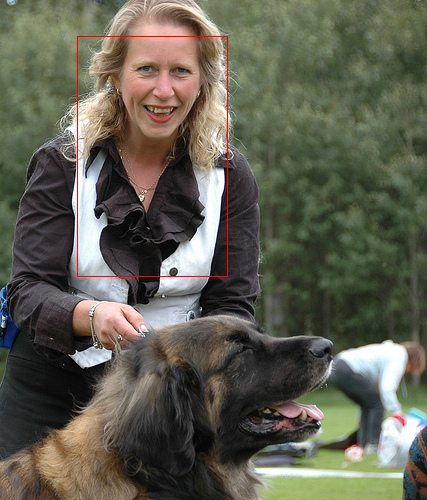

[[11.224867   0.4012206 64.51328   73.84249  ]]


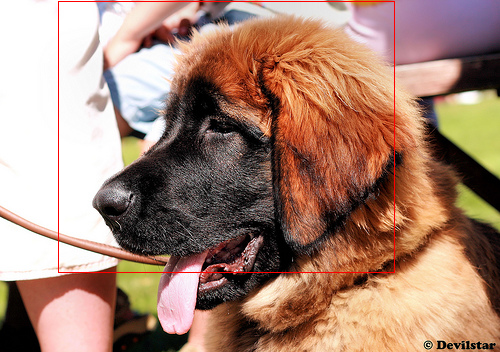

[[22.708714 23.844585 35.60937  43.242016]]


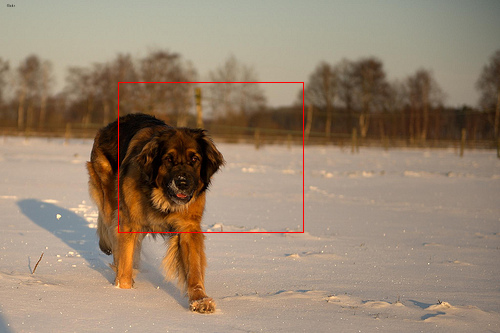

[[12.604043  9.640689 46.086937 56.833763]]


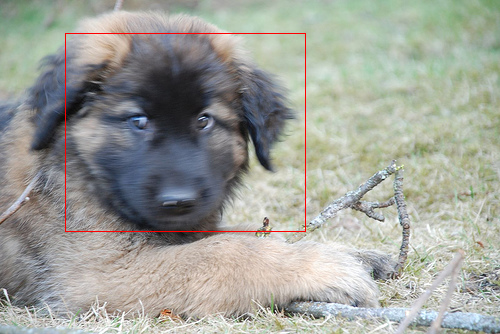

[[ 9.994747 10.27728  43.06129  49.82238 ]]


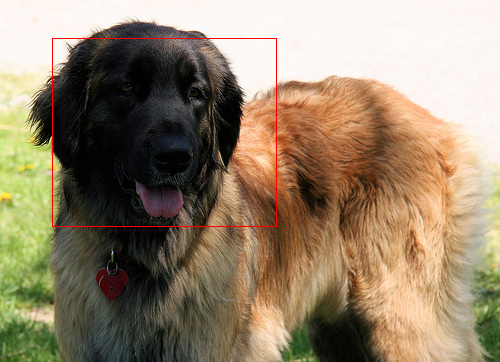

In [89]:
predict("model-0.52_cat_entropy.h5")

### BinaryClass Loss

[[ 9.737049   4.3043504 39.19737   47.393497 ]]


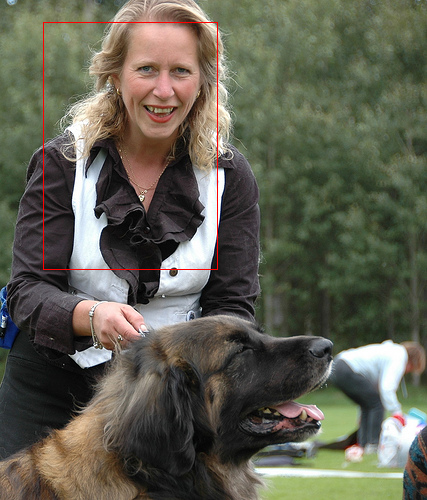

[[ 5.753727   2.9658172 69.17292   75.74651  ]]


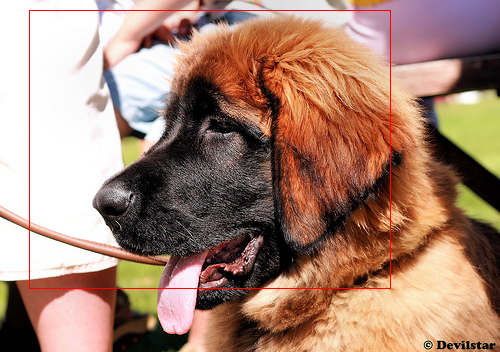

[[17.893652 26.426733 30.552313 40.904163]]


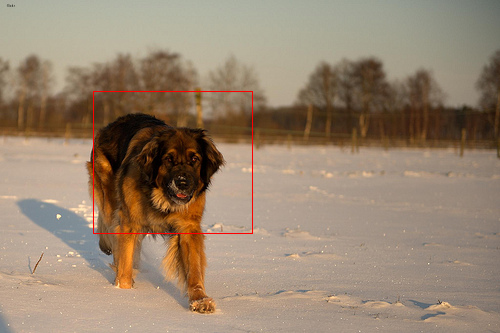

[[12.812251 12.830261 42.279095 60.347748]]


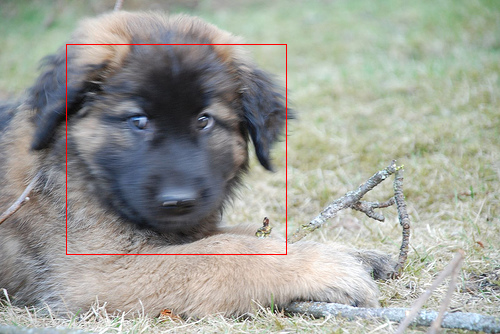

[[ 5.580753 11.403171 41.704014 49.00857 ]]


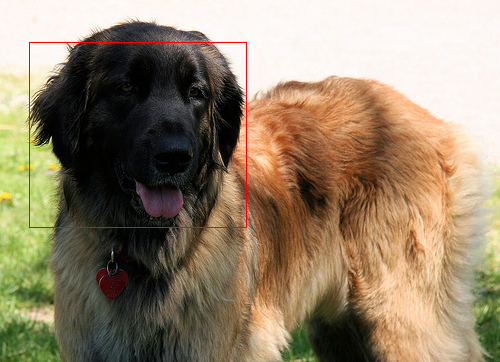

In [90]:
predict("model-0.51_focal.h5")

## Original
Trying to replicate the original stuff from [here](https://github.com/lars76/object-localization/tree/master/example_1) so as to understand why the above results are so poor

In [50]:
!wget https://raw.githubusercontent.com/lars76/object-localization/master/example_1/train.py

--2019-12-27 18:04:58--  https://raw.githubusercontent.com/lars76/object-localization/master/example_1/train.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4807 (4.7K) [text/plain]
Saving to: ‘train.py’

train.py            100%[===================>]   4.69K  --.-KB/s    in 0s      

2019-12-27 18:04:58 (117 MB/s) - ‘train.py’ saved [4807/4807]



In [51]:
!wget https://raw.githubusercontent.com/lars76/object-localization/master/example_1/test.py

--2019-12-27 18:05:53--  https://raw.githubusercontent.com/lars76/object-localization/master/example_1/test.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1065 (1.0K) [text/plain]
Saving to: ‘test.py’

test.py             100%[===================>]   1.04K  --.-KB/s    in 0s      

2019-12-27 18:05:53 (205 MB/s) - ‘test.py’ saved [1065/1065]



In [52]:
!python3 train.py

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
9412608/9406464 [==============================] - 1s 0us/step
2019-12-27 18:06:18.631817: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-12-27 18:06:18.634282: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-12-27 18:06:18.634818: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:04.0
2019-12-27 18:06:18.635076: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2019-12-27 18:06:18.637080: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcub

In [91]:
predict("model-0.45.h5")

ValueError: ignored